In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('data//train.csv', index_col=0)

In [9]:
display(data.head(5))
print(data.shape)

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


(7613, 4)


In [7]:
data.isnull().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [15]:
data.describe(include="all")

,keyword,location,text,target
count,7552,5080,7613,7613.00000
unique,221,3341,7503,NaN
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,45,104,10,NaN
mean,NaN,NaN,NaN,0.42966
std,NaN,NaN,NaN,0.49506
min,NaN,NaN,NaN,0.00000
25%,NaN,NaN,NaN,0.00000
50%,NaN,NaN,NaN,0.00000
75%,NaN,NaN,NaN,1.00000


the number of ones is 3271
The number of zeros is 4342


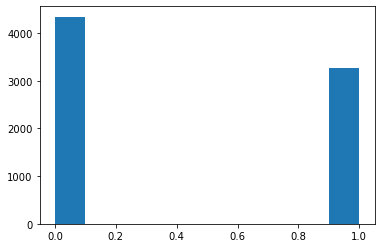

In [20]:
print('the number of ones is {}'.format(data['target'].sum()))
print("The number of zeros is {}".format(data.shape[0] - data['target'].sum()))
plt.hist(data['target'])
plt.show()

## Baseline

In [23]:
vectorizer = TfidfVectorizer()

In [29]:
X = vectorizer.fit_transform(data.text)
y = data.target.values

In [33]:
X_train, X_test, y_train, ytest = train_test_split(X, y, test_size=0.2) 

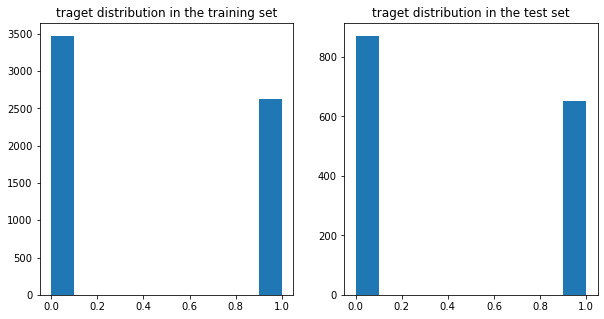

In [49]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121)
ax1.hist(y_train)
ax1.set_title('traget distribution in the training set')

ax2 = fig.add_subplot(122)
ax2.hist(ytest)
ax2.set_title('traget distribution in the test set')

fig.show()

In [34]:
svm = SVC()

In [35]:
svm.fit(X_train, y_train)

SVC()

In [36]:
y_predicted = svm.predict(X_test)

In [43]:
print(classification_report(ytest, y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       871
           1       0.88      0.64      0.74       652

    accuracy                           0.81      1523
   macro avg       0.83      0.79      0.80      1523
weighted avg       0.82      0.81      0.80      1523

